<a href="https://colab.research.google.com/github/umer7224/umer7224/blob/main/Kaggle_Car_Pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import relevant packages
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML

In [ ]:
df = pd.read_csv("car data.csv")

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
# here (Fuel_Type,	Seller_Type,	Transmission and	Owner) are categorical type feature
# we will check how many unique values / categories are there in a type
# cant use on multiple column

unique_Seller= df["Seller_Type"].unique()
unique_Fuel = df["Fuel_Type"].unique()
unique_Trans = df["Transmission"].unique()
unique_Owner = df["Owner"].unique()
print(f"unique_Seller= {unique_Seller} \n unique_Fuel= {unique_Fuel} \n unique_Trans = {unique_Trans} \n unique_Owner = {unique_Owner}")

unique_Seller= ['Dealer' 'Individual'] 
 unique_Fuel= ['Petrol' 'Diesel' 'CNG'] 
 unique_Trans = ['Manual' 'Automatic'] 
 unique_Owner = [0 1 3]


In [ ]:
# checking missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
 df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
# checking columns
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
# removing car_Name coloumn
final_df = df.drop('Car_Name', axis = 1)
final_df.head()

# 2nd way: final_df = df[["all columns name seperated with comma"]]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# creating new feature / column
final_df['current_year'] = 2024
final_df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2024
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2024
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2024
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2024


In [ ]:
# subtracting current year with year
final_df['no_years'] = final_df['current_year'] - final_df['Year']
final_df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2024,8
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2024,9
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2024,15
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2024,7


In [ ]:
# droping irrelivant values
final_df.drop(['Year', 'current_year'], axis=1, inplace=True)
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [ ]:
#it will convert categorical variables into binary
# here we drop first variable ... as if both other variables are 0, it means third one is 1....

final_df = pd.get_dummies(final_df, drop_first = True)
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,0,1,0,1
1,4.75,9.54,43000,0,11,1,0,0,1
2,7.25,9.85,6900,0,7,0,1,0,1
3,2.85,4.15,5200,0,13,0,1,0,1
4,4.60,6.87,42450,0,10,1,0,0,1


In [ ]:
 # corelation
final_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

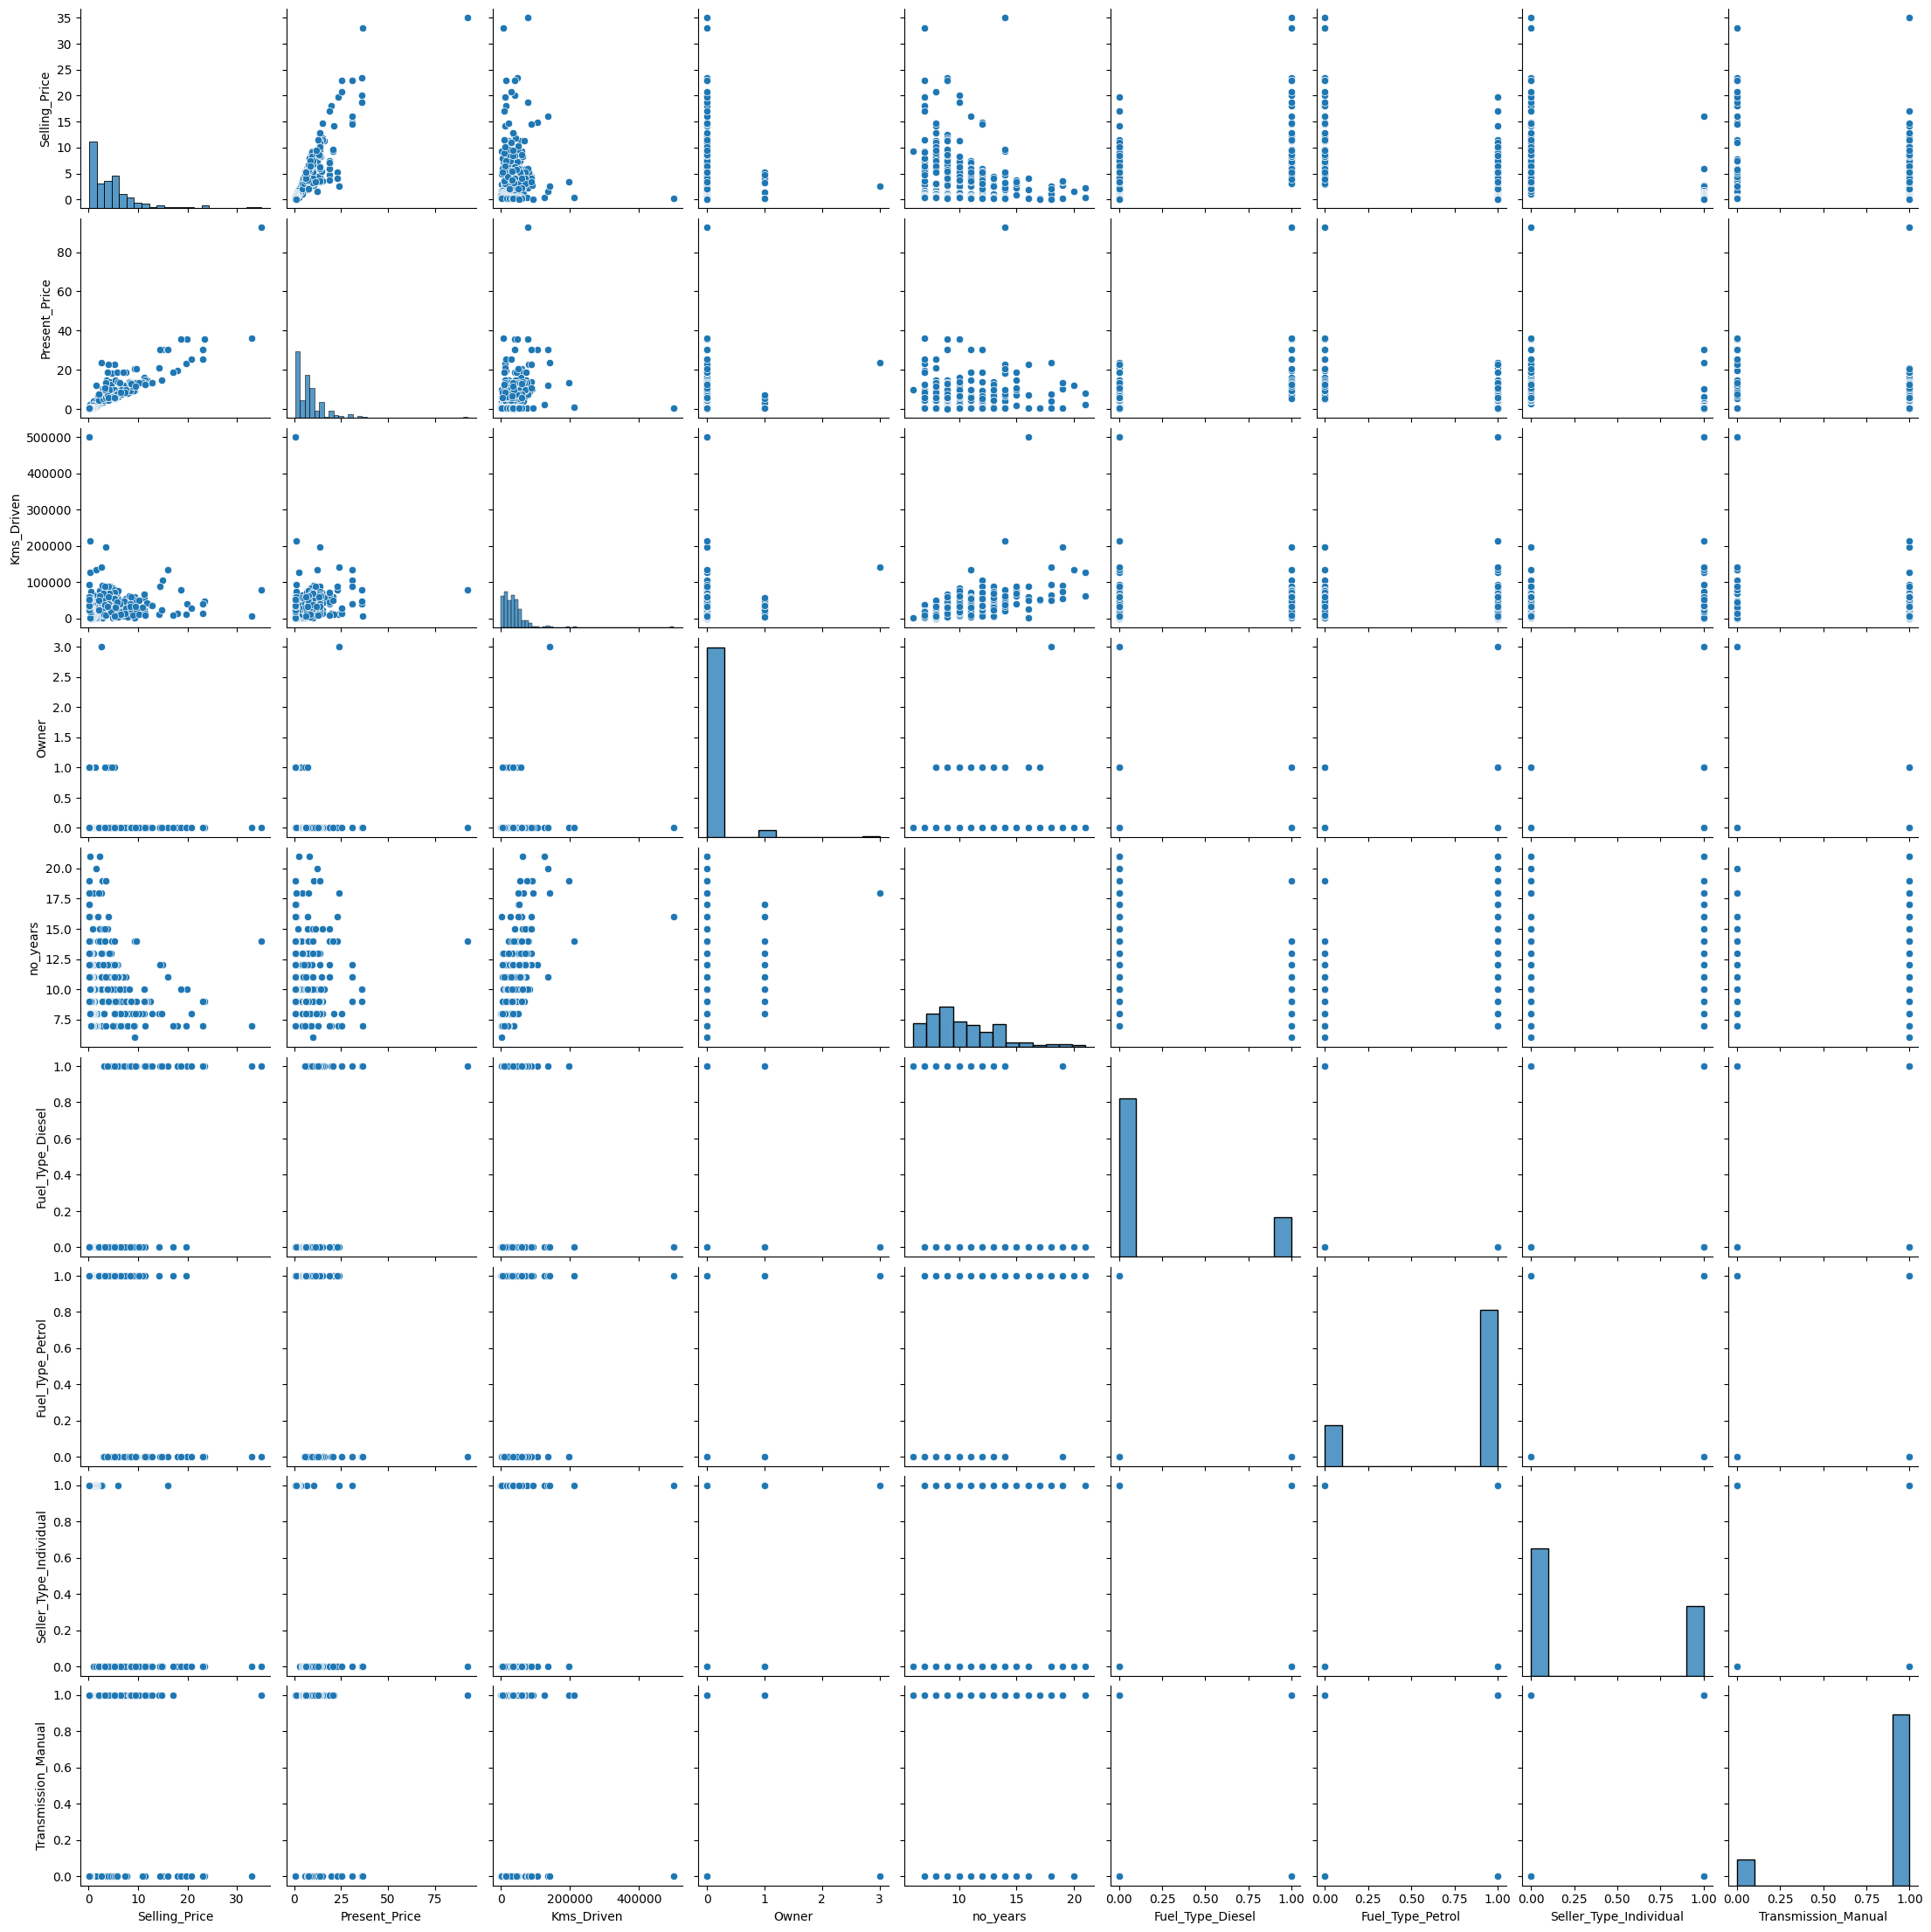

In [ ]:
sns.pairplot(final_df)

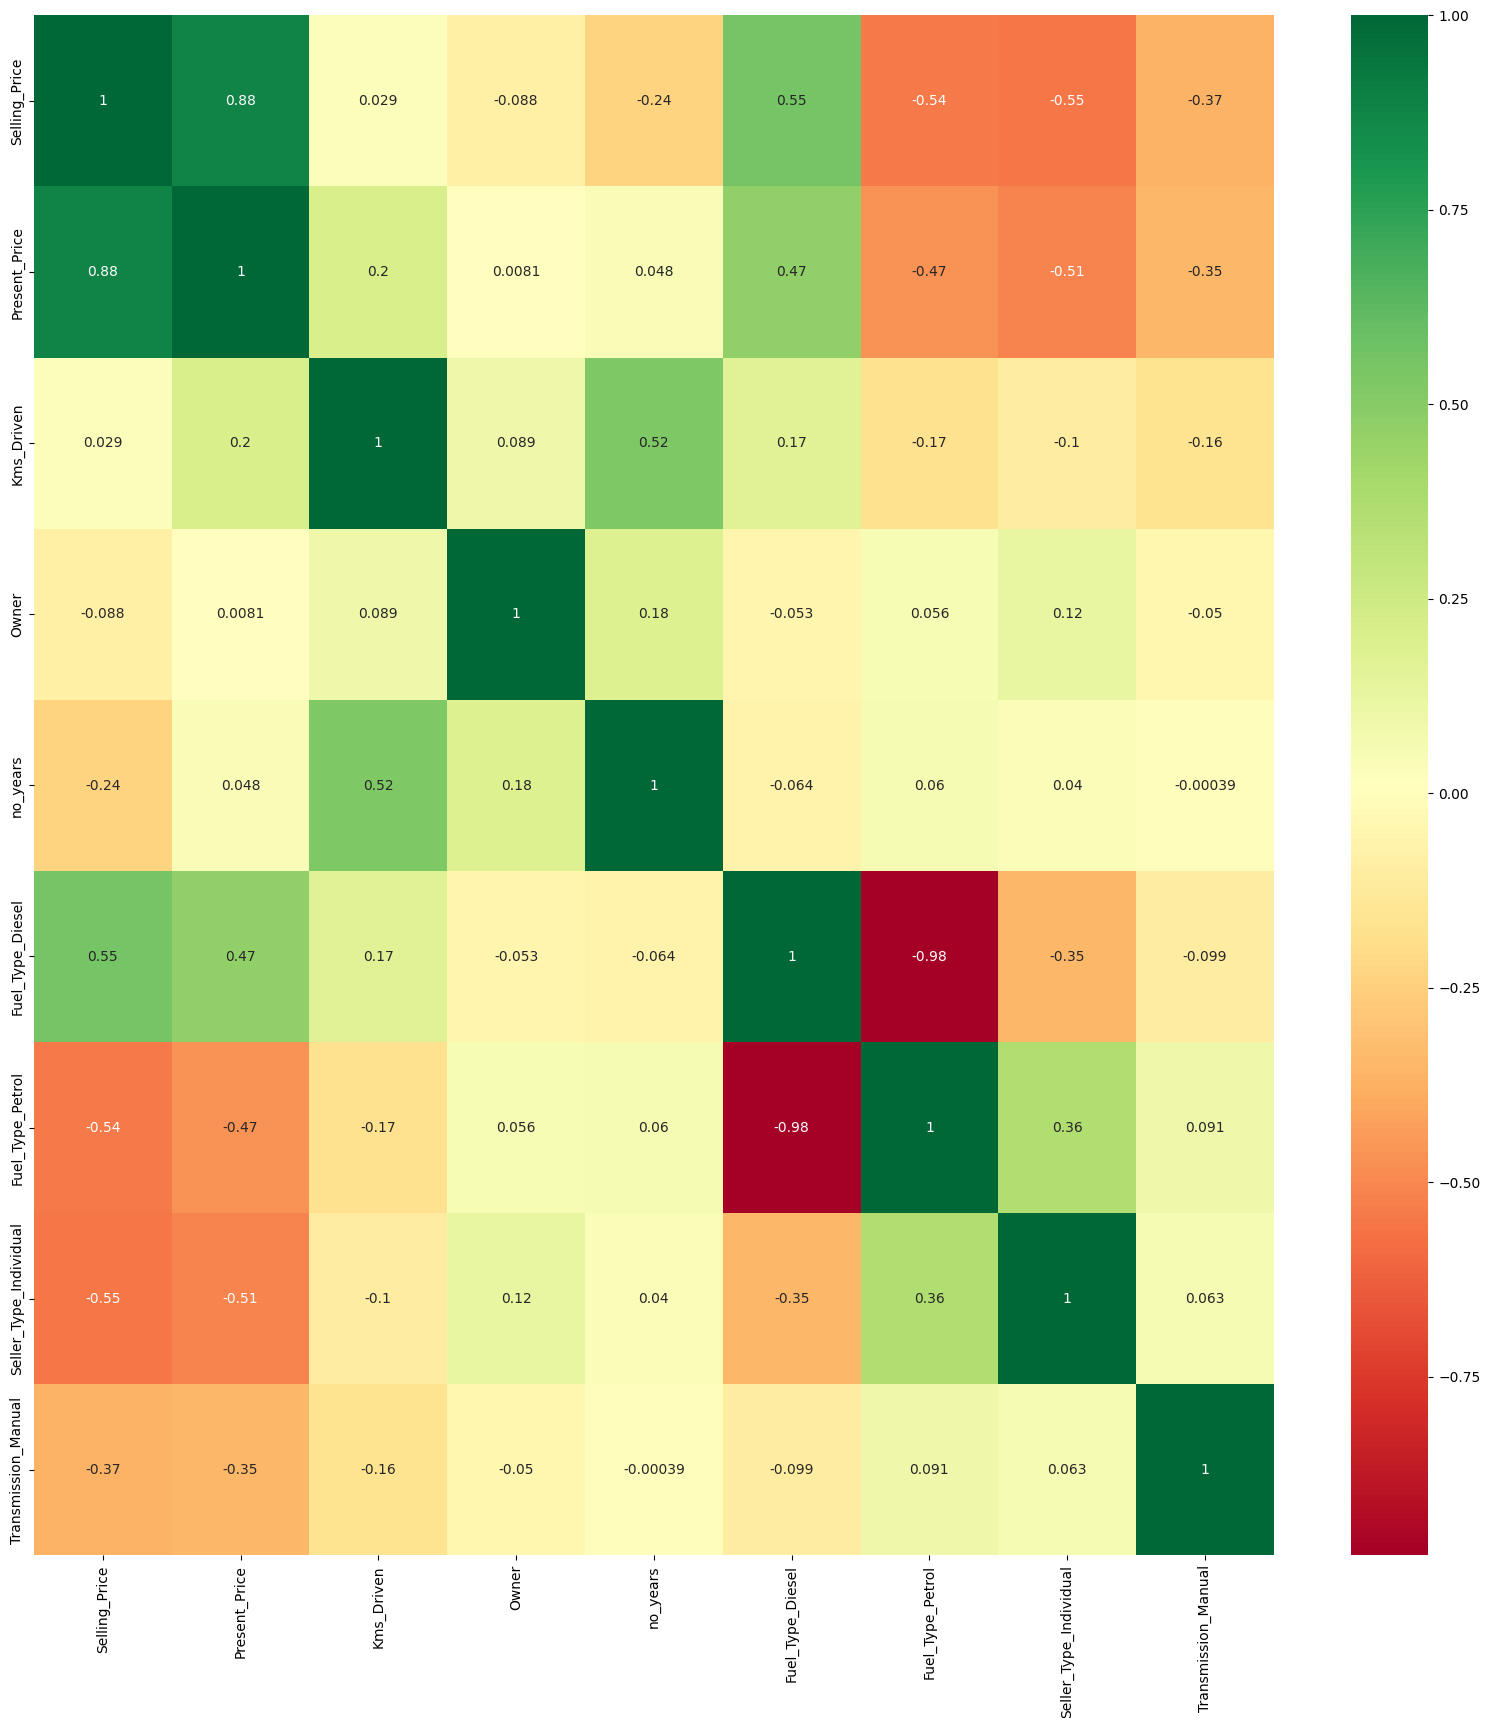

In [ ]:
cormat = final_df.corr()
top_corr_feat = cormat.index
plt.figure(figsize = (20,20))
# ploting heat map
g = sns.heatmap(final_df[top_corr_feat].corr(), annot= True, cmap='RdYlGn')

In [ ]:
# putting all data except selling price in x for testing
x = final_df.drop('Selling_Price', axis = 1)
x.head()

,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,10,0,1,0,1
1,9.54,43000,0,11,1,0,0,1
2,9.85,6900,0,7,0,1,0,1
3,4.15,5200,0,13,0,1,0,1
4,6.87,42450,0,10,1,0,0,1


In [ ]:
# putting dependent variable in y
y = final_df['Selling_Price']
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [ ]:
# Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [ ]:
print(model.feature_importances_)

[0.37346039 0.03970643 0.00046795 0.07617224 0.23269935 0.0145116
 0.11698486 0.14599718]


In [ ]:
# printing coloumn names with values, based on model importance
# importing model
feature_imp = model.feature_importances_

# assigning training variable columns
feature_names = x.columns

# combining both columns
feature_imp_with_names = zip(feature_names, feature_imp)

# using for loop, puting data into name and importance variable
for name, importance in feature_imp_with_names:
  print(f"Feature: {name}, Importance: {importance}")

Feature: Present_Price, Importance: 0.3734603879239498
Feature: Kms_Driven, Importance: 0.03970642592260882
Feature: Owner, Importance: 0.0004679524214269268
Feature: no_years, Importance: 0.0761722402673628
Feature: Fuel_Type_Diesel, Importance: 0.23269935483021664
Feature: Fuel_Type_Petrol, Importance: 0.014511597830747366
Feature: Seller_Type_Individual, Importance: 0.11698486267442706
Feature: Transmission_Manual, Importance: 0.1459971781292606


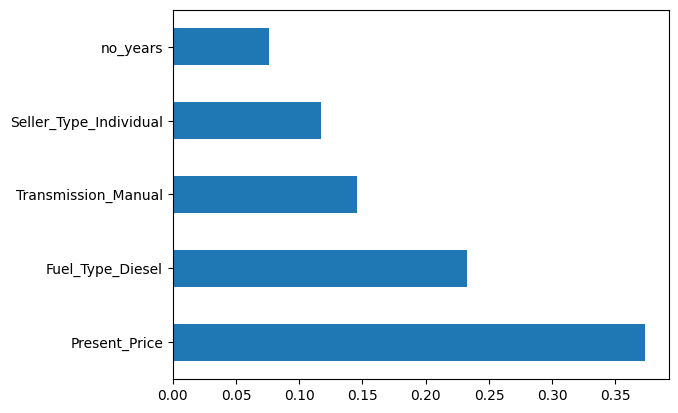

In [ ]:
 # plotting graph
 feat_imp = pd.Series(model.feature_importances_,index = x.columns)
 feat_imp.nlargest(5).plot(kind = 'barh')
 plt.show()

In [ ]:
# model testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
x_train.shape

(240, 8)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [ ]:
# Hyper parameters
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num= 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Creating random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf }
print(random_grid)

NameError: name 'max_features' is not defined